# PyCarert Data Analysis and Model
PyCaret is an open-source, low-code machine learning library in Python that simplifies the process of building, comparing, and deploying machine learning models. It is designed to make the entire workflow faster and more efficient, especially for tasks like regression, classification, clustering, anomaly detection, etc. It provides easy-to-use functions for feature preprocessing, model training, comparison, and deployment. It is an excellent tool when time or expertise in machine learning is limited but you still want high-quality models quickly.

# Problem Definition
In this project, a classification model was applied to predict whether an individual is diagnosed with diabetes (Diabetes_Diagnosis) based on various health indicators. Classification is a fundamental supervised learning technique used to categorize data into predefined labels. By leveraging machine learning algorithms, the project aims to identify patterns in patient data that help in early detection of diabetes.

## Importance of Classification in This Study
#### Early Detection & Diagnosis
Helps in predicting diabetes based on risk factors such as glucose levels, BMI, and blood pressure.
Enables proactive healthcare interventions.
#### Improved Medical Decision-Making
Assists doctors in making data-driven diagnoses rather than relying only on symptoms.
Reduces misdiagnosis risks.
#### Enhancing Healthcare Efficiency
Automates patient screening, helping in prioritizing high-risk patients.
Saves time for medical professionals.

## How Classification is Applied in this Project
We used PyCaret's classification module to train and evaluate different models.
The dataset was preprocessed to handle missing values and normalize features.
The best-performing model was selected based on accuracy and Kappa score.

## Importing Important Libraries
For this project, a mix of data handling, visualization, machine learning, and model evaluation libraries was imported.  
Below are the most important libraries for the project.

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns          
from pycaret.classification import *    

## Loading Dataset
A dataset for the prevalence of Diabetes in the US was used for the project. The dataset was obtained from Kaggle.com. 
The dataset was downloaded and place in the right path to be able to load it into the ipy notebook.

In [40]:
data = pd.read_csv('./diabetes_dataset.csv')
data.head()

,Age,Gender,Ethnicity,Income,BMI,Blood_Pressure,Cholesterol,Exercise_Hours_Per_Week,Alcohol_Consumption_Per_Week,Smoking_Status,...,Insulin_Resistance,Heart_Disease_History,Physical_Activity_Level,Fast_Food_Intake_Per_Week,Processed_Food_Intake_Per_Week,Daily_Caloric_Intake,Sleep_Hours_Per_Night,Stress_Level,Medication_Use,Diabetes_Diagnosis
0,69,Female,Other,39557,38.2,94.6,252.9,3.3,4,Never,...,5.1,0,Low,3,4,3641,8.7,Low,0,1
1,32,Male,Black,90663,33.6,167.0,282.6,4.6,7,Never,...,1.7,1,Moderate,8,0,3361,8.0,Low,1,0
2,89,Male,White,116180,39.4,100.6,106.8,6.1,5,Former,...,4.9,1,Low,9,8,2397,8.8,High,1,0
3,78,Male,Other,73059,40.6,111.1,169.7,7.4,9,Never,...,9.8,0,High,7,5,2491,6.4,Low,1,1
4,38,Female,White,35389,29.7,143.3,296.5,2.6,6,Never,...,1.7,1,Moderate,0,7,1325,6.6,High,1,0


## Data Processing
Data processing involves identifying the shape of the data for the project.
It also includes identifying the columns in the dataset to know the target and feature variables for the project.
This involves dropping rows with missing values and filling missing target values with the mean.  
In this project, some nonnumeric data fields in the dataset were removed to prevent unnecessary noise that can affect the performance of the model.

In [41]:
# Removing nonnumeric data field in the dataset to prevent unnecessary noise that can affect the performance of the model
data = data.drop(columns=['Gender', 'Ethnicity', 'Smoking_Status', 'Physical_Activity_Level', 'Stress_Level'])

In [56]:
data.columns

Index(['Age', 'Income', 'BMI', 'Blood_Pressure', 'Cholesterol',
       'Exercise_Hours_Per_Week', 'Alcohol_Consumption_Per_Week',
       'Family_History_Diabetes', 'Glucose_Level', 'HbA1c',
       'Insulin_Resistance', 'Heart_Disease_History',
       'Fast_Food_Intake_Per_Week', 'Processed_Food_Intake_Per_Week',
       'Daily_Caloric_Intake', 'Sleep_Hours_Per_Night', 'Medication_Use',
       'Diabetes_Diagnosis'],
      dtype='object')

In [58]:
data.isna().sum()

Age                               0
Income                            0
BMI                               0
Blood_Pressure                    0
Cholesterol                       0
Exercise_Hours_Per_Week           0
Alcohol_Consumption_Per_Week      0
Family_History_Diabetes           0
Glucose_Level                     0
HbA1c                             0
Insulin_Resistance                0
Heart_Disease_History             0
Fast_Food_Intake_Per_Week         0
Processed_Food_Intake_Per_Week    0
Daily_Caloric_Intake              0
Sleep_Hours_Per_Night             0
Medication_Use                    0
Diabetes_Diagnosis                0
dtype: int64

In [42]:
data

,Age,Income,BMI,Blood_Pressure,Cholesterol,Exercise_Hours_Per_Week,Alcohol_Consumption_Per_Week,Family_History_Diabetes,Glucose_Level,HbA1c,Insulin_Resistance,Heart_Disease_History,Fast_Food_Intake_Per_Week,Processed_Food_Intake_Per_Week,Daily_Caloric_Intake,Sleep_Hours_Per_Night,Medication_Use,Diabetes_Diagnosis
0,69,39557,38.2,94.6,252.9,3.3,4,0,101.0,6.1,5.1,0,3,4,3641,8.7,0,1
1,32,90663,33.6,167.0,282.6,4.6,7,0,178.1,4.4,1.7,1,8,0,3361,8.0,1,0
2,89,116180,39.4,100.6,106.8,6.1,5,1,184.4,8.3,4.9,1,9,8,2397,8.8,1,0
3,78,73059,40.6,111.1,169.7,7.4,9,0,126.7,7.4,9.8,0,7,5,2491,6.4,1,1
4,38,35389,29.7,143.3,296.5,2.6,6,1,199.9,8.5,1.7,1,0,7,1325,6.6,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,21,99216,20.8,100.9,263.3,9.9,6,0,143.6,8.8,6.4,1,1,5,3812,4.3,0,1
49996,35,68404,42.6,138.0,220.8,2.6,14,0,75.2,4.6,5.2,0,3,9,3935,9.3,0,1
49997,46,21337,44.9,179.2,211.1,7.7,9,0,173.0,8.4,9.5,1,5,2,2579,7.4,1,0
49998,56,93760,24.6,179.4,292.1,7.9,6,1,198.1,9.0,7.7,0,6,0,1951,6.2,0,0


In [43]:
data['Diabetes_Diagnosis'].value_counts()

Diabetes_Diagnosis
1    25104
0    24896
Name: count, dtype: int64

## Exploratory Data Analysis
The work projected some exploratory data analysis in the dataset. Below are some EDAs that were found in the data:

In [44]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,50000.0,53.398700,20.799006,18.0,35.0,53.0,71.00,89.0
Income,50000.0,85176.555140,37574.185279,20000.0,52551.0,85355.5,117782.75,149997.0
BMI,50000.0,31.818748,7.637138,18.5,25.2,31.8,38.40,45.0
Blood_Pressure,50000.0,135.080956,26.039637,90.0,112.4,135.2,157.60,180.0
Cholesterol,50000.0,200.185024,57.737684,100.0,150.4,200.3,250.30,300.0
Exercise_Hours_Per_Week,50000.0,4.991036,2.882748,0.0,2.5,5.0,7.50,10.0
Alcohol_Consumption_Per_Week,50000.0,7.004840,4.324922,0.0,3.0,7.0,11.00,14.0
Family_History_Diabetes,50000.0,0.501920,0.500001,0.0,0.0,1.0,1.00,1.0
Glucose_Level,50000.0,135.015394,37.458042,70.0,102.5,135.3,167.30,200.0
HbA1c,50000.0,6.999164,1.727541,4.0,5.5,7.0,8.50,10.0


<Figure size 1200x800 with 0 Axes>

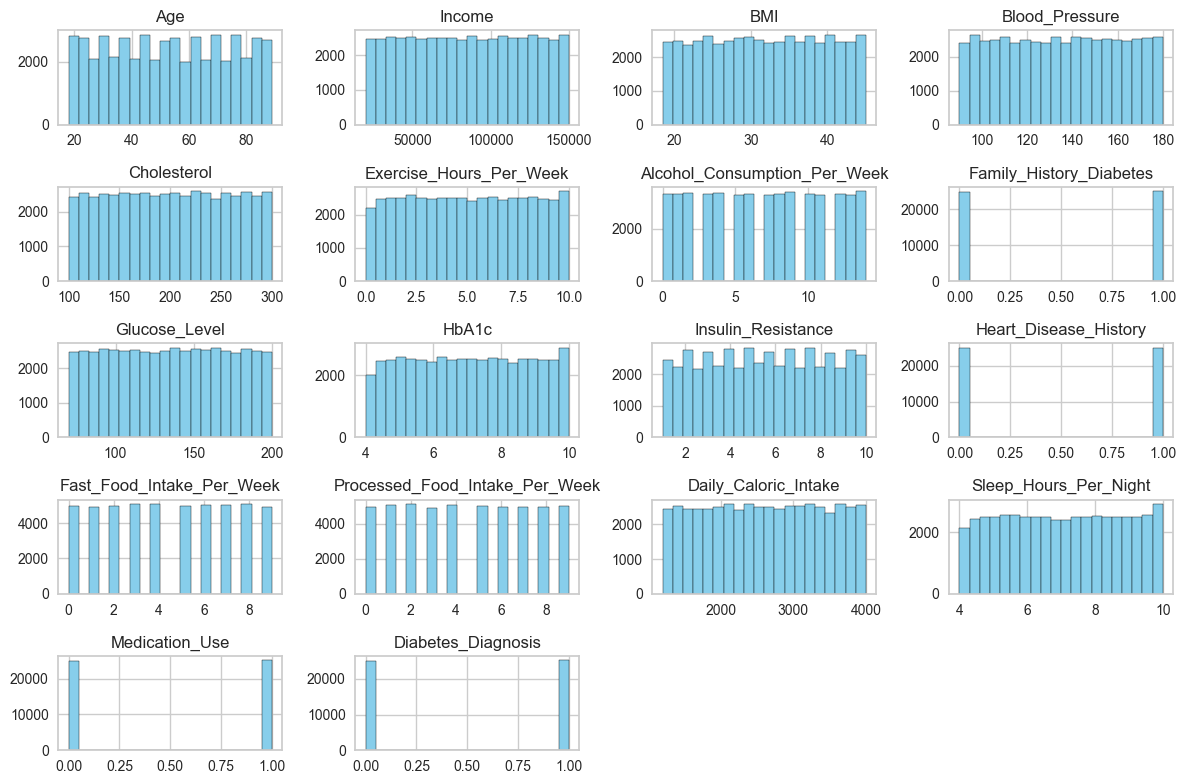

In [45]:
# Histograms for each numeric feature
plt.figure(figsize=(12, 8))
data.hist(bins=20, figsize=(12, 8), color='skyblue', edgecolor='black')
plt.tight_layout()
plt.show()

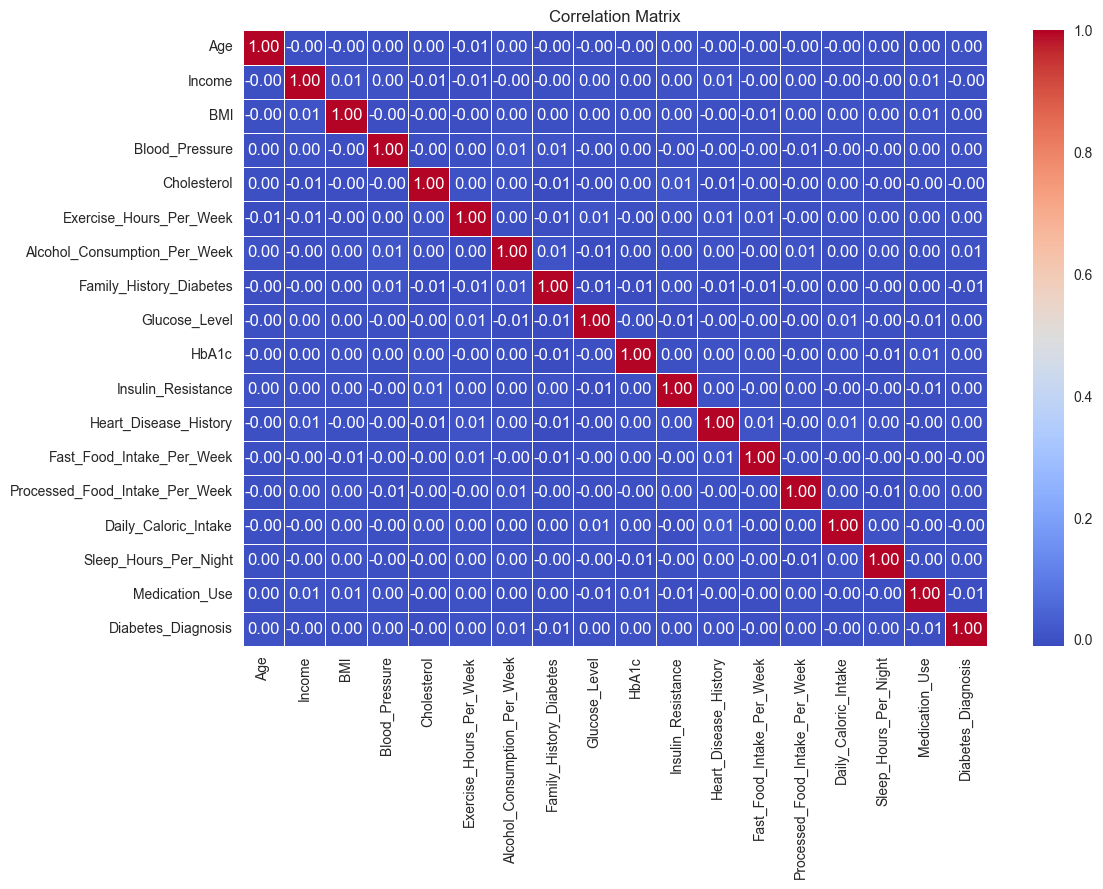

In [46]:
# Correlation Heatmap
# Correlation matrix between numeric features
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

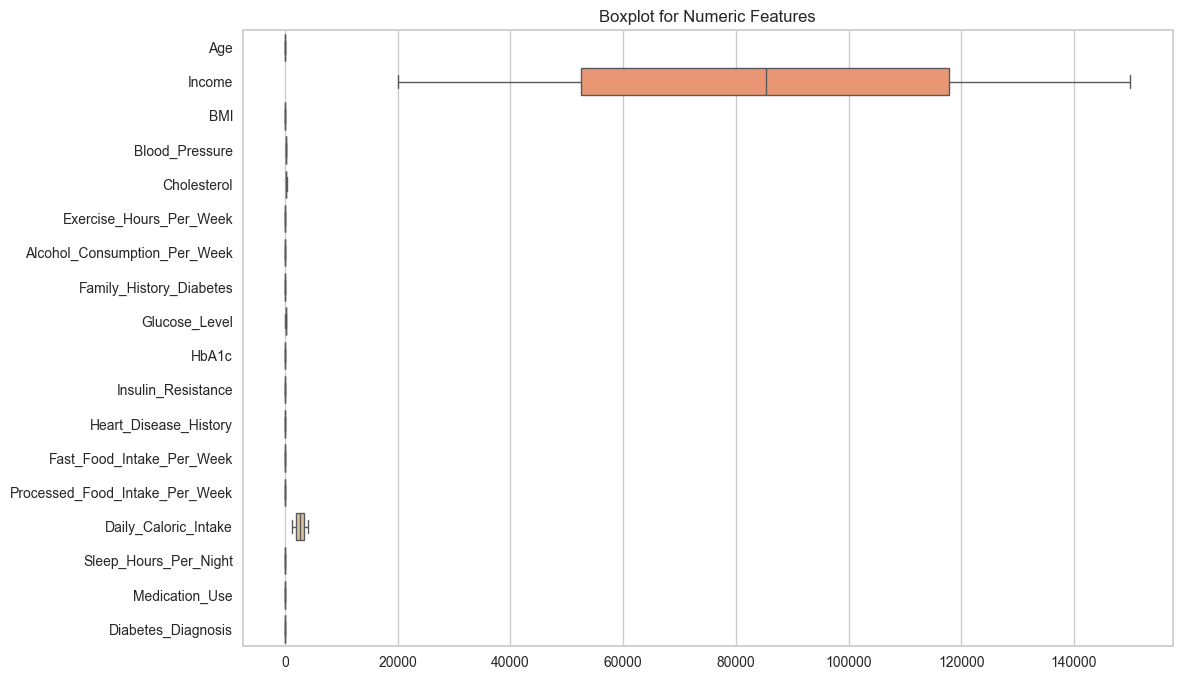

In [47]:
# Boxplot to visualize outliers (for numeric columns)
plt.figure(figsize=(12, 8))
sns.boxplot(data=data, orient="h", palette="Set2")
plt.title('Boxplot for Numeric Features')
plt.show()

### Setting Up PyCaret Experiment for the Project
Setting up a PyCaret experiment (setup()) is the most important step in using PyCaret for classification or regression.  
It automatically preprocesses the data, selects the best models, and simplifies model training.

In [48]:
s = setup(data, target = 'Diabetes_Diagnosis', session_id = 42)   

,Description,Value
0,Session id,42
1,Target,Diabetes_Diagnosis
2,Target type,Binary
3,Original data shape,"(50000, 18)"
4,Transformed data shape,"(50000, 18)"
5,Transformed train set shape,"(35000, 18)"
6,Transformed test set shape,"(15000, 18)"
7,Numeric features,17
8,Preprocess,True
9,Imputation type,simple


s.y_transformed.value_counts()

### Comparing Models for the Project
Available PyCaret Classification models were compared in this project for proper consideration of the best-performing model.  
This helps to identify the strength of each of the models that are available for the project.

In [49]:
s.compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
dummy,Dummy Classifier,0.5021,0.5000,1.0000,0.5021,0.6685,0.0000,0.0000,0.0420
lightgbm,Light Gradient Boosting Machine,0.5015,0.5005,0.5145,0.5035,0.5089,0.0029,0.0029,0.4600
svm,SVM - Linear Kernel,0.5008,0.5051,0.6998,0.3515,0.4679,-0.0001,-0.0017,0.7580
knn,K Neighbors Classifier,0.5003,0.4997,0.5012,0.5024,0.5018,0.0005,0.0005,0.8130
et,Extra Trees Classifier,0.5003,0.4989,0.4828,0.5024,0.4923,0.0007,0.0007,2.0870
qda,Quadratic Discriminant Analysis,0.4993,0.4972,0.5232,0.5013,0.5120,-0.0017,-0.0017,0.0700
gbc,Gradient Boosting Classifier,0.4986,0.4958,0.5466,0.5005,0.5225,-0.0033,-0.0033,4.7180
dt,Decision Tree Classifier,0.4982,0.4982,0.5013,0.5003,0.5008,-0.0037,-0.0037,0.5160
rf,Random Forest Classifier,0.4979,0.4975,0.4789,0.5000,0.4892,-0.0040,-0.0040,4.9750
ridge,Ridge Classifier,0.4964,0.4944,0.5769,0.4986,0.5349,-0.0079,-0.0080,0.0600


DummyClassifier(constant=None, random_state=42, strategy='prior')

### Model Creation
The project considered Light Gradient Boosting Machine (lightgbm_mdl) after careful consideration,  
Though Dummy Classifier appears to be the best.

In [51]:
lightgbm_mdl = s.create_model('lightgbm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5057,0.4983,0.5142,0.5079,0.5110,0.0114,0.0114
1,0.5000,0.4990,0.5210,0.5022,0.5114,-0.0002,-0.0002
2,0.5074,0.5123,0.5330,0.5092,0.5208,0.0146,0.0146
3,0.4989,0.5049,0.4889,0.5009,0.4948,-0.0022,-0.0022
4,0.5043,0.5011,0.4986,0.5064,0.5024,0.0086,0.0086
5,0.4943,0.4926,0.5139,0.4964,0.5050,-0.0116,-0.0116
6,0.5046,0.5047,0.5287,0.5063,0.5173,0.0090,0.0090
7,0.5057,0.5052,0.5145,0.5076,0.5110,0.0114,0.0114
8,0.4966,0.4939,0.5242,0.4986,0.5111,-0.0071,-0.0071


In [52]:
lightgbm_mdl

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=42, reg_alpha=0.0, reg_lambda=0.0, subsample=1.0,
               subsample_for_bin=200000, subsample_freq=0)

In [53]:
evaluate_model(lightgbm_mdl)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [54]:
pred = predict_model(lightgbm_mdl)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.4955,0.4918,0.5123,0.4977,0.5049,-0.0091,-0.0091


In [55]:
# Check predictions
print(pred[['Diabetes_Diagnosis']])

       Diabetes_Diagnosis
45497                   0
15554                   0
21742                   0
18446                   0
46758                   0
...                   ...
20695                   0
48174                   0
22938                   0
15816                   1
2775                    1

[15000 rows x 1 columns]


### Conlusion
The application of classification in this study demonstrates the potential of AI in healthcare. By using machine learning, we can predict diabetes more accurately, leading to early interventions and better health outcomes.